In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
df=pd.read_csv('C:/Users/Rory/Downloads/price_paid_records.csv',index_col = 'Transaction unique identifier')
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df['Date of Transfer'].dtype

dtype('<M8[ns]')

In [3]:
df.columns

Index(['Price', 'Date of Transfer', 'Property Type', 'Old/New', 'Duration',
       'Town/City', 'District', 'County', 'PPDCategory Type',
       'Record Status - monthly file only'],
      dtype='object')

In [4]:
(df['County']== 'CARDIFF').value_counts()

False    22355233
True       134115
Name: County, dtype: int64

In [5]:
#Removing all house sales not in Cardiff
notcardiff=df[df['County']!='CARDIFF'].index
df.drop(notcardiff, inplace=True)
(df['County']== 'CARDIFF').value_counts()

True    134115
Name: County, dtype: int64

In [6]:
#Checking for missing values
df.isnull().sum()

Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

Sampling - The dataset is too large for analysis and model building, therefore, I must reduce the size. I want to sample the dataset to best achieve an even spread of samples in Data of Transfer.

In [7]:
df['Date of Transfer'].describe()

count                  134115
unique                   6155
top       2016-03-31 00:00:00
freq                      263
first     1995-01-03 00:00:00
last      2017-06-26 00:00:00
Name: Date of Transfer, dtype: object

In [8]:
df=df.drop_duplicates(subset=['Date of Transfer'], keep='first')

In [9]:
df['Date of Transfer'].describe()

count                    6155
unique                   6155
top       2000-10-13 00:00:00
freq                        1
first     1995-01-03 00:00:00
last      2017-06-26 00:00:00
Name: Date of Transfer, dtype: object

In [10]:
df['Property Type'].value_counts()

T    2397
S    1521
F    1357
D     858
O      22
Name: Property Type, dtype: int64

The largest property type is terrace house - also the property type of my interest. 
Removing other property types will make this more managable and any models created more accurate FOR MY PURPOSE

In [11]:
notterrace=df[df['Property Type']!='T'].index
df.drop(notterrace, inplace=True)
df['Property Type'].value_counts()

T    2397
Name: Property Type, dtype: int64

In [12]:
df.drop(['PPDCategory Type','Record Status - monthly file only','Town/City','District','County'],axis=1)
df.head()

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
Transaction unique identifier,,,,,,,,,,
{742E87B7-5134-487D-8370-1E456AACB593},35450,1995-07-14,T,Y,F,CARDIFF,CARDIFF,CARDIFF,A,A
{D32149A0-38C6-4941-B288-423F13479616},43500,1995-12-07,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A
{24DF25B8-94E7-41A3-9356-554B70405C36},21000,1995-10-26,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A
{CB8C758E-8EE7-4B8B-88CA-58C34A33B833},28700,1995-10-20,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A
{0DB1DE63-226D-4A0B-867A-58C5E8336201},31000,1995-11-30,T,N,F,CARDIFF,CARDIFF,CARDIFF,A,A


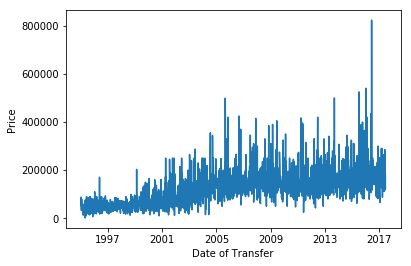

In [13]:
ax=sns.lineplot(x="Date of Transfer", y="Price", data=df)

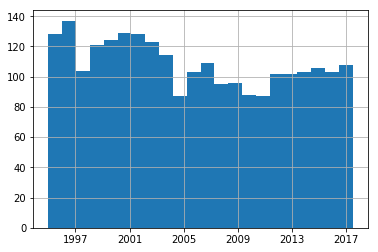

In [14]:
df['Date of Transfer'].hist(bins=22)

In [15]:
#Outlier removal - lets get rid of those million pound houses.....
df['Year']=df['Date of Transfer'].dt.year
outliers=[]
threshold=3
yr_mean=pd.DataFrame(df.groupby(['Year'], as_index=False)['Price'].mean().set_index('Year'))
yr_std=pd.DataFrame(df.groupby(['Year'], as_index=False).agg({'Price':['std']}).set_index('Year'))

for d in df['Year'].unique():                
    for label, row in df.iterrows():
        if row['Year']==d:
            z_score= np.divide(np.subtract(row['Price'], (yr_mean.values[yr_mean.index==d])),(yr_std.values[yr_std.index==d]))
            if np.abs(z_score) > threshold:
                outliers.append(label)
        
#Removing outliers
b4size=df.size
for i in outliers:

    df.drop(i , inplace=True)
aftsize=df.size
print(b4size)
print('House sales before outlier removal')
print(b4size-aftsize)
print('House sales removed')        


26367
House sales before outlier removal
407
House sales removed


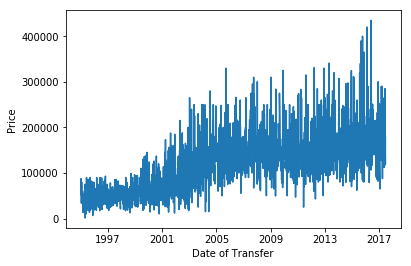

In [16]:
ax=sns.lineplot(x="Date of Transfer", y="Price", data=df)

Text(0.5,1,'Average Sale Price : Property Age')

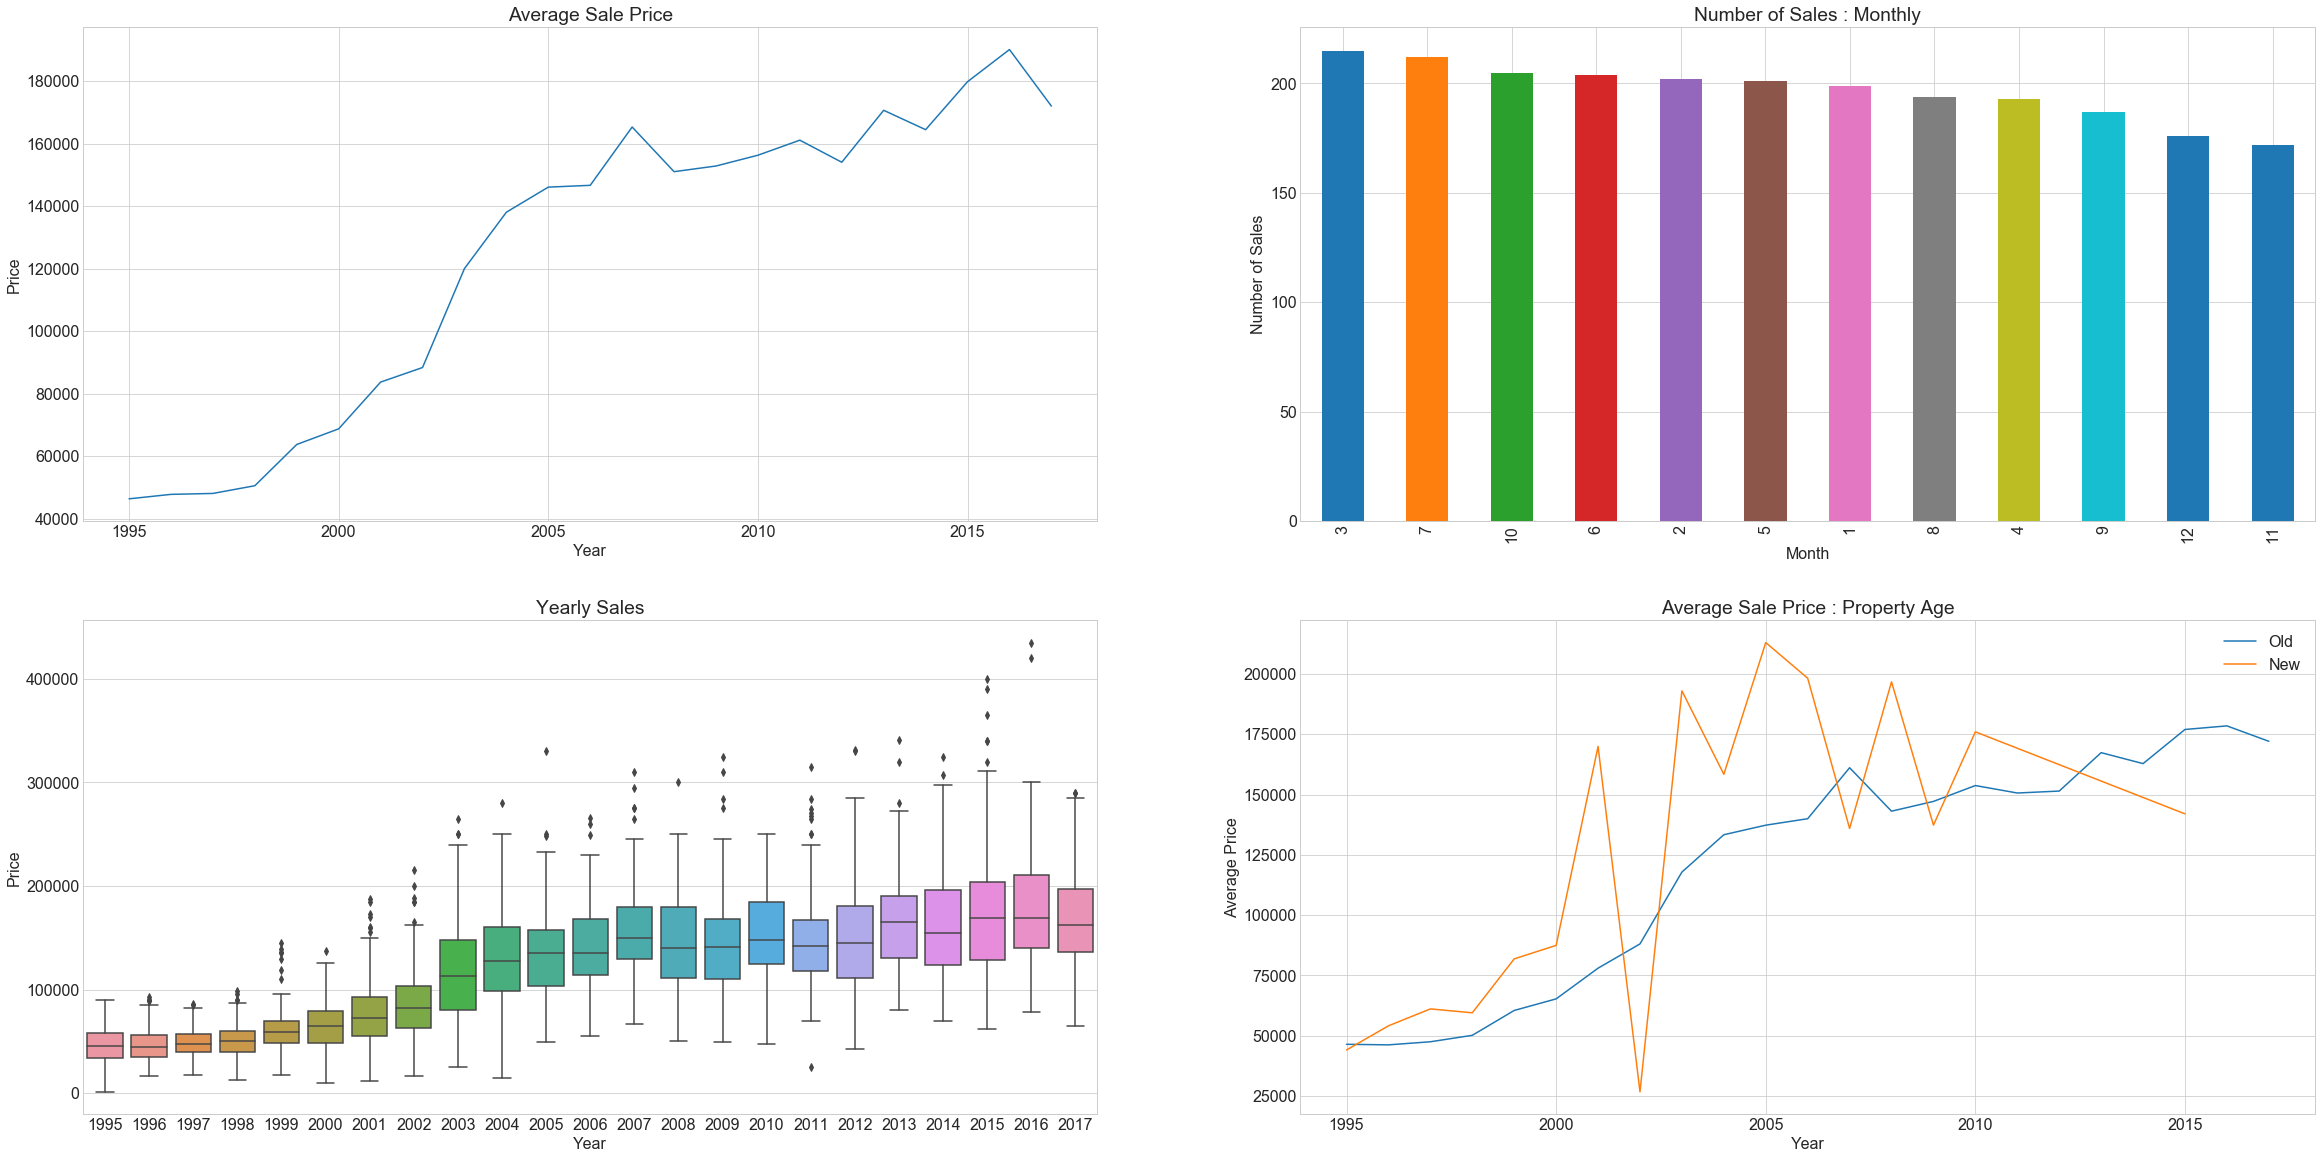

In [17]:
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(40,20))
font = { 'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.subplot(2,2,1)
sns.lineplot(x="Year",y="Price",data=yr_mean.reset_index())
plt.title('Average Sale Price')
plt.subplot(2,2,2)
df['Date of Transfer'].dt.month.value_counts().plot('bar')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Number of Sales : Monthly')

plt.subplot(2,2,3)
sns.boxplot(x='Year',y="Price",data=df)
plt.title('Yearly Sales')

plt.subplot(2,2,4)
old=df[df["Old/New"]=="N"]
new=df[df["Old/New"]=="Y"]
old.groupby("Year").Price.mean().plot()
new.groupby("Year").Price.mean().plot()
plt.legend(['Old','New'])
plt.ylabel('Average Price')
plt.title('Average Sale Price : Property Age')

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(40,20))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [19]:
tsd=df
tsd.set_index('Date of Transfer', inplace = True)
tsd.index
#converting to time series
ts=tsd['Price']
ts.head(10)

Date of Transfer
1995-07-14    35450
1995-12-07    43500
1995-10-26    21000
1995-10-20    28700
1995-11-30    31000
1995-08-02    33000
1995-07-10    54000
1995-07-21    55000
1995-11-29    49950
1995-01-27    57000
Name: Price, dtype: int64

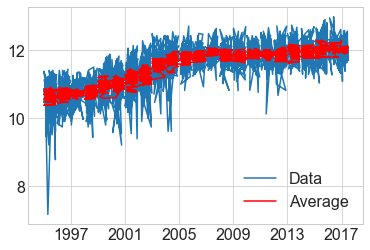

In [20]:
tslog=np.log(ts)
mov_avg=pd.Series(tslog).rolling(window=12).mean()
plt.plot(tslog)
plt.plot(mov_avg,color='red')
plt.legend(['Data','Average'])
#shows positive trend

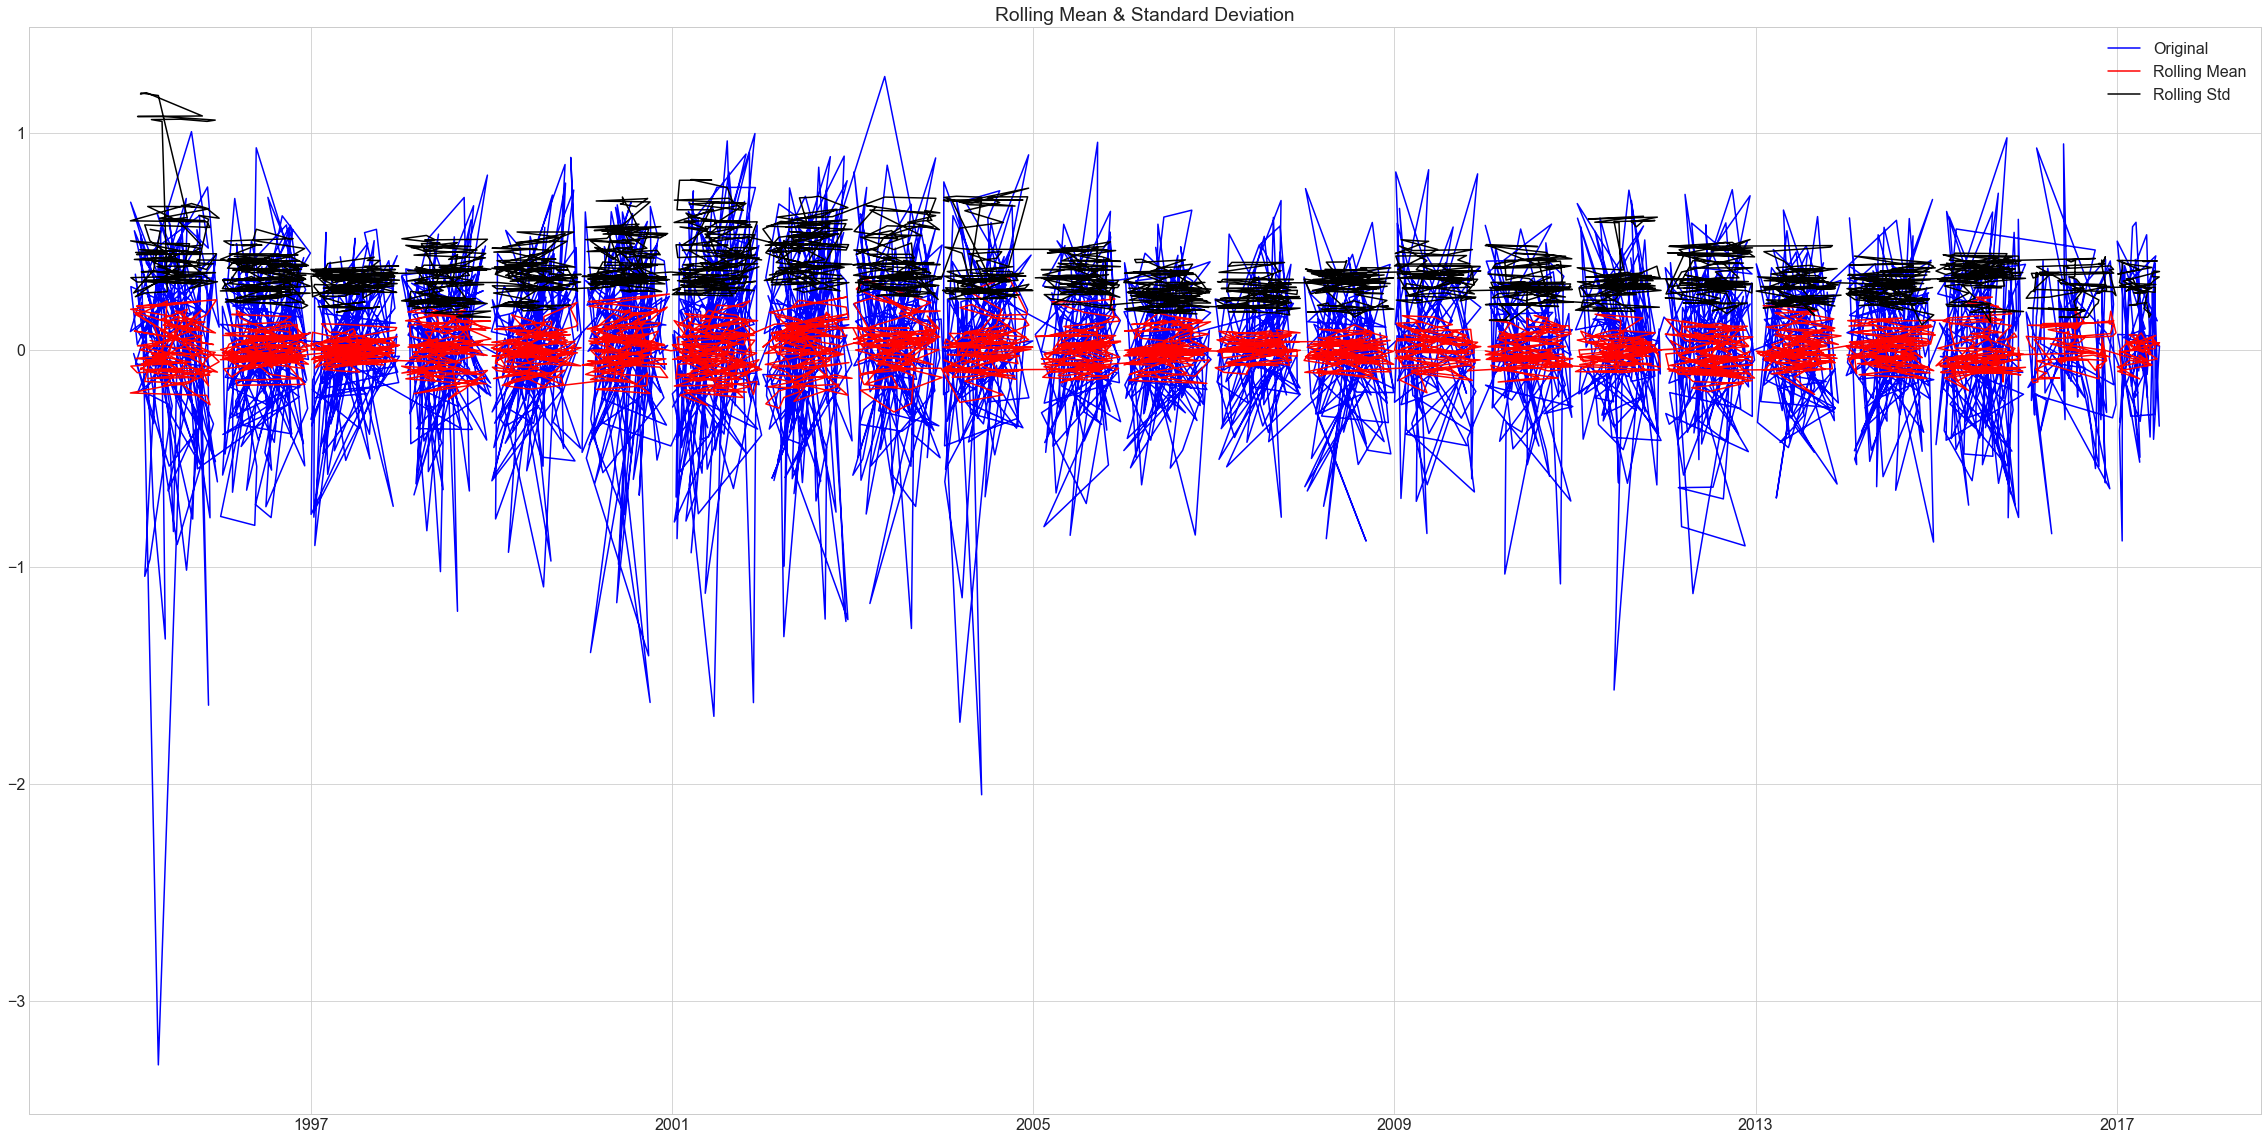

Results of Dickey-Fuller Test:
Test Statistic                -1.443622e+01
p-value                        7.488088e-27
#Lags Used                     2.700000e+01
Number of Observations Used    2.321000e+03
Critical Value (1%)           -3.433171e+00
Critical Value (5%)           -2.862786e+00
Critical Value (10%)          -2.567433e+00
dtype: float64


In [21]:
tslog_smoothed=tslog-mov_avg
tslog.replace([np.inf, -np.inf], np.nan)
tslog_smoothed.isnull().value_counts()
tslog_smoothed.dropna(inplace=True)
test_stationarity(tslog_smoothed)

C:\Users\Rory\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


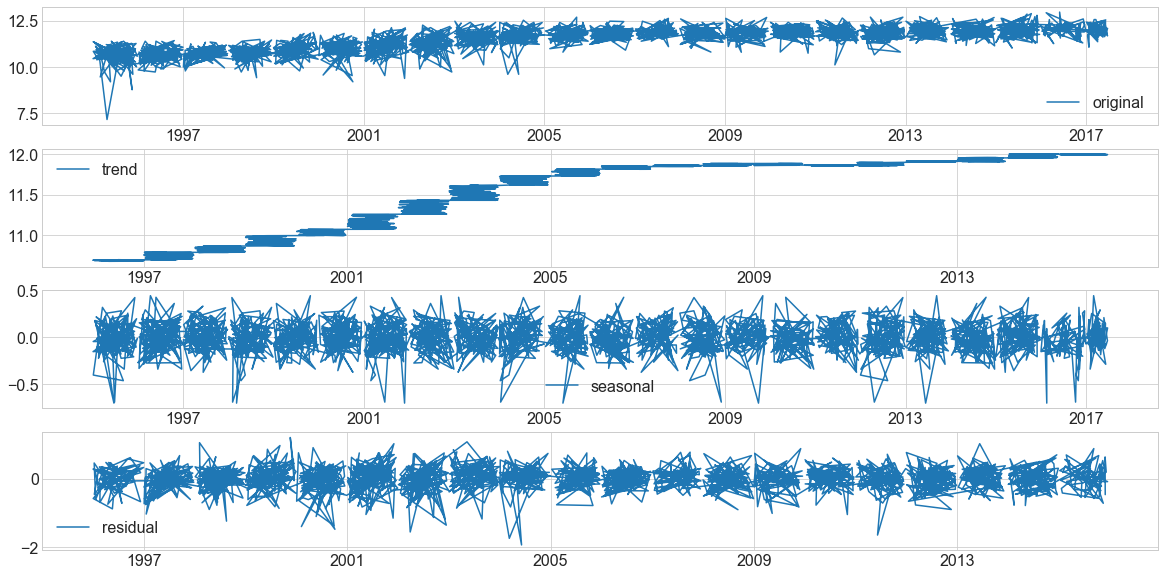

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(tslog,freq=365)

trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(tslog,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

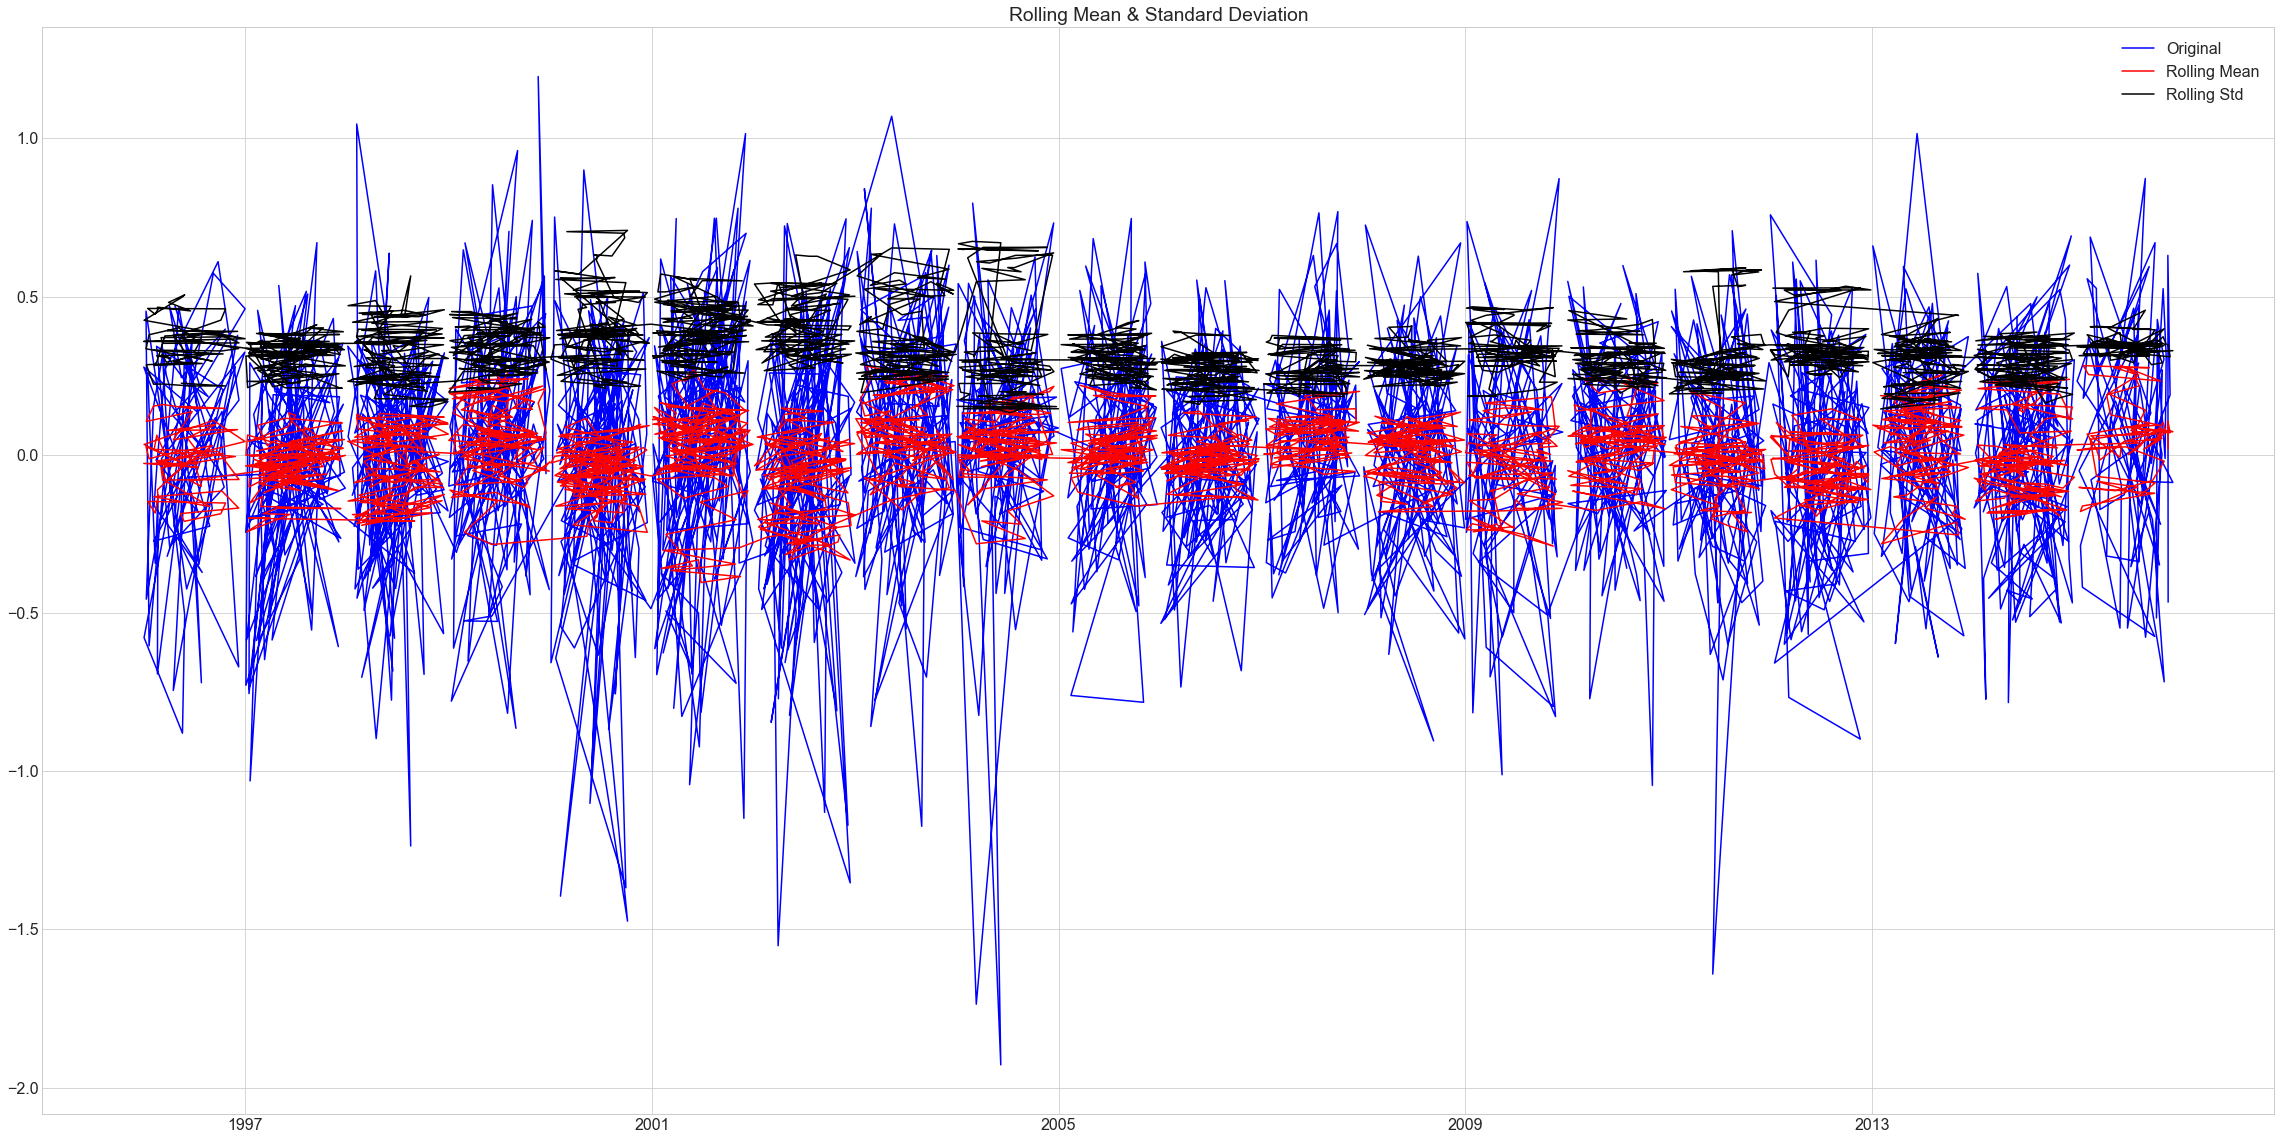

Results of Dickey-Fuller Test:
Test Statistic                  -24.455233
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1993.000000
Critical Value (1%)              -3.433635
Critical Value (5%)              -2.862991
Critical Value (10%)             -2.567543
dtype: float64


In [23]:
tslogdecomp=residual
tslogdecomp.dropna(inplace=True)
test_stationarity(tslogdecomp)

Text(0.5,1,'Partial Autocorrelation Function')

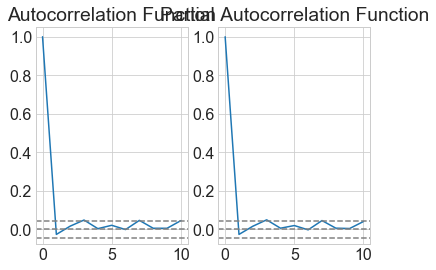

In [24]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(tslogdecomp, nlags=10)
lag_pacf=pacf(tslogdecomp, nlags=10, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tslogdecomp)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

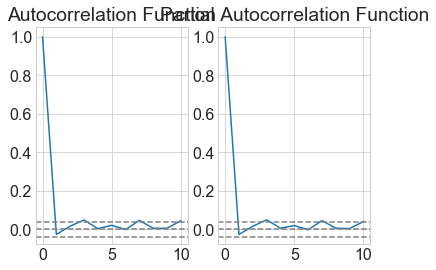

In [98]:

lag_acf2=acf(tslog_smoothed, nlags=10)
lag_pacf2=pacf(tslog_smoothed, nlags=10, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tslog_smoothed)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tslog_smoothed)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tslog_smoothed)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(tslog_smoothed)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

C:\Users\Rory\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Rory\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: nan')

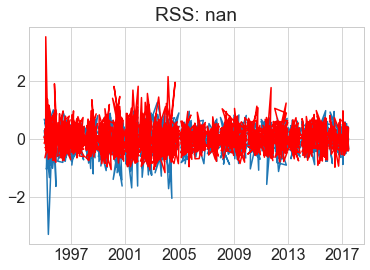

In [99]:
model= ARIMA(tslog, order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(tslog_smoothed)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tslog_smoothed)**2))

C:\Users\Rory\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Rory\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: nan')

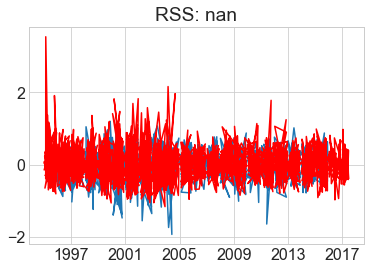

In [109]:
model2= ARIMA(tslog, order=(1,1,1))
results_ARIMA2=model.fit(disp=-1)
plt.plot(tslogdecomp)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tslogdecomp)**2))

In [100]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())


Date of Transfer
1995-12-07    0.000607
1995-10-26   -0.103924
1995-10-20    0.431365
1995-11-30    0.081654
1995-08-02    0.002340
dtype: float64


In [103]:

predictions_ARIMA_log=pd.Series(tslog,index=tslog.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA_log.head()

Date of Transfer
1995-01-03    10.316036
1995-01-04    11.428929
1995-01-05    10.943807
1995-01-16    11.085277
1995-01-19    11.624566
dtype: float64

Text(0.5,1,'RMSE: 77723.5356')

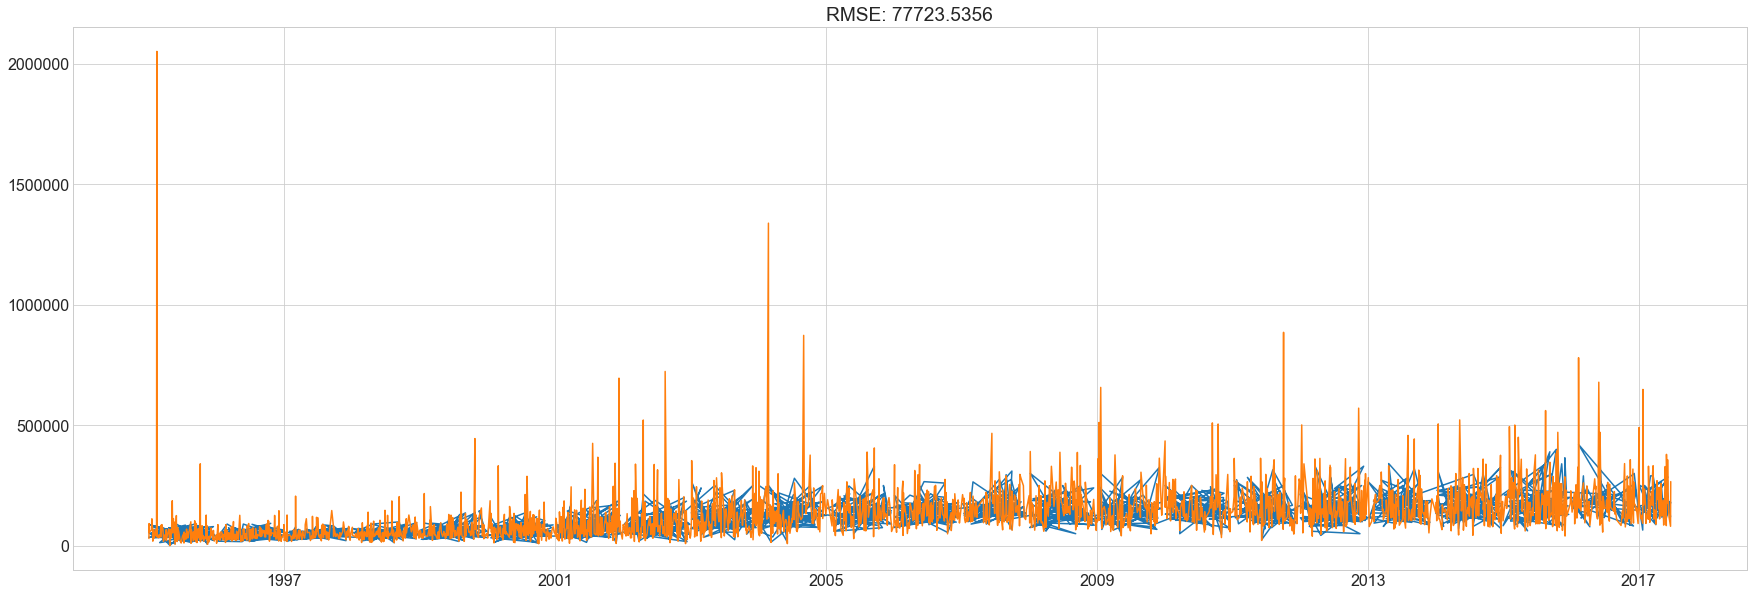

In [108]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.figure(figsize=(30,10))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Date of Transfer
1995-12-07    0.000607
1995-10-26   -0.103924
1995-10-20    0.431365
1995-11-30    0.081654
1995-08-02    0.002340
dtype: float64


Text(0.5,1,'RMSE: 77723.5356')

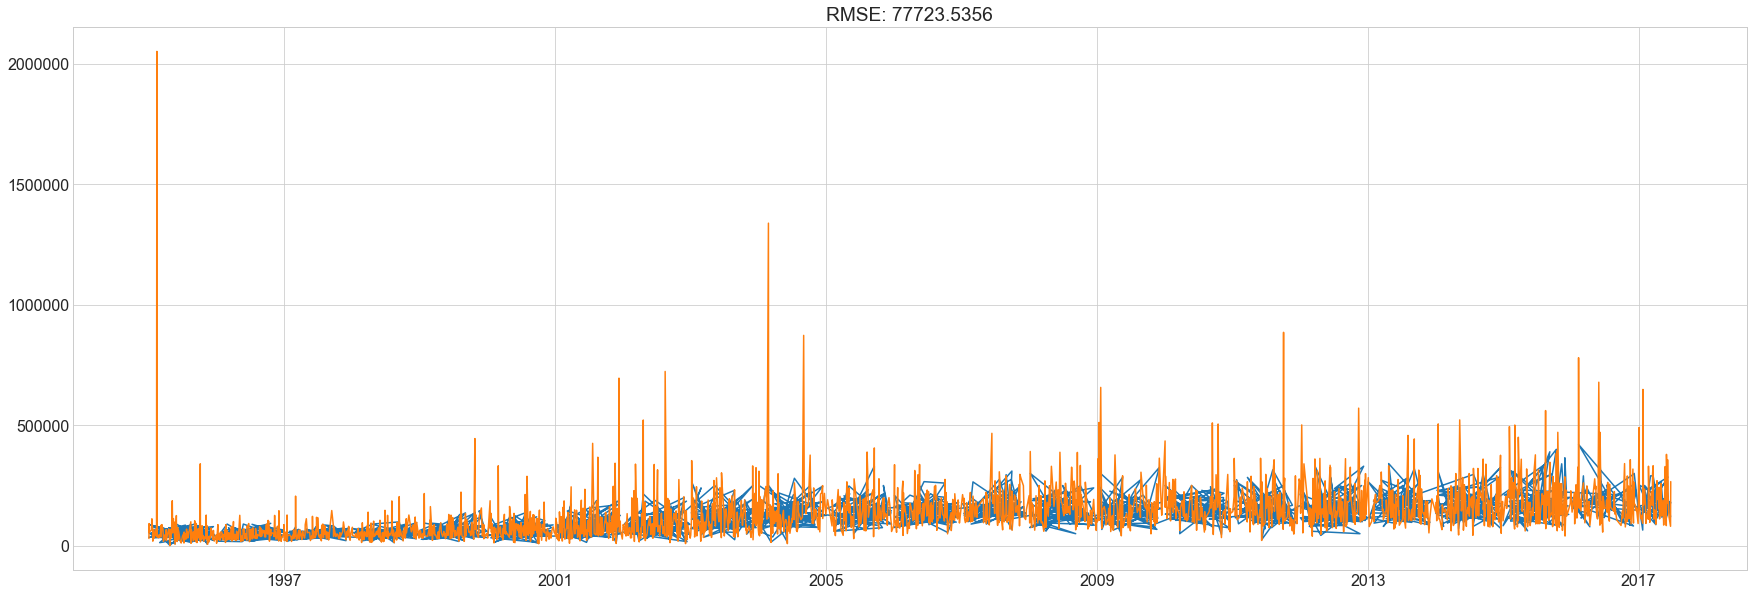

In [110]:
predictions_ARIMA_diff2=pd.Series(results_ARIMA2.fittedvalues, copy=True)
print (predictions_ARIMA_diff2.head())
predictions_ARIMA_log2=pd.Series(tslog,index=tslog.index)
predictions_ARIMA_log2=predictions_ARIMA_log2.add(predictions_ARIMA_diff2,fill_value=0)
predictions_ARIMA_log2.head()
predictions_ARIMA2=np.exp(predictions_ARIMA_log2)
plt.figure(figsize=(30,10))
plt.plot(ts)
plt.plot(predictions_ARIMA2)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA2-ts)**2)/len(ts)))

In [140]:
tsdecomp=np.exp(tslogdecomp)
X=tsdecomp[tsdecomp[:,np.newaxis]].reset_index()
Y=tsdecomp[:,np.newaxis]

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X['Date of Transfer'], Y, test_size=0.33, random_state=42 )

In [155]:
from xgboost import XGBRegressor
X_test=X_test[:,np.newaxis]
#y_test=y_test[:,np.newaxis]

xgb=XGBRegressor()
xgb.fit(X_train[:,np.newaxis], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [160]:
from sklearn.metrics import mean_absolute_percentage_error
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')

    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\Rory\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [161]:
from sklearn.metrics import mean_absolute_percentage_error
plotModelResults(xgb)

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\Rory\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [148]:
xgb.predict(X_test)

array([1.3344932 , 0.7721765 , 1.4527459 , 1.0816476 , 1.1104019 ,
       1.0245464 , 0.93257135, 1.1569709 , 1.1754112 , 1.2467661 ,
       1.0725102 , 0.22736037, 1.8159047 , 1.060086  , 1.2399533 ,
       0.79442126, 1.0984502 , 2.097045  , 1.8517567 , 1.4029101 ,
       1.1620927 , 1.1496654 , 0.9965594 , 0.636822  , 1.1676788 ,
       0.97953033, 0.9722432 , 1.2451614 , 1.092164  , 1.0377066 ,
       1.2001429 , 0.86712146, 1.1930523 , 0.68934023, 1.2726567 ,
       0.84811115, 0.9329485 , 1.1335859 , 1.2854152 , 0.61022246,
       1.4568479 , 0.72463894, 0.9597065 , 1.0391401 , 1.1676788 ,
       1.0021247 , 1.1184995 , 1.1802576 , 0.8876462 , 0.9041958 ,
       1.7145356 , 1.0592147 , 1.0283879 , 1.1048331 , 1.012789  ,
       1.3357385 , 0.8953472 , 1.322228  , 1.2692409 , 1.1802576 ,
       1.408969  , 1.3092403 , 0.9145803 , 0.909032  , 1.0446529 ,
       0.8203304 , 0.7227197 , 2.0761094 , 0.7537987 , 1.0245464 ,
       1.955106  , 0.68934023, 1.4657087 , 0.9145803 , 1.17541

AttributeError: 'numpy.ndarray' object has no attribute 'values'